### Week one homework:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm
from matplotlib.colors import Normalize 

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

### Heart attack data

In [2]:
ha_costs_df = pd.read_csv ('data/mmd_heart_attack_data.csv')
ha_costs_df.head()

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
0,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1001,Autauga County,ALABAMA,Urban,All,undefined,40470
1,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1003,Baldwin County,ALABAMA,Rural,All,undefined,36615
2,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1005,Barbour County,ALABAMA,Rural,All,undefined,46509
3,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1007,Bibb County,ALABAMA,Urban,All,undefined,42949
4,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1009,Blount County,ALABAMA,Urban,All,undefined,50067


In [3]:
ha_costs_df.tail()

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
2651,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72097,Mayaguez Municipio,PUERTO RICO,Urban,All,undefined,28128
2652,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72113,Ponce Municipio,PUERTO RICO,Urban,All,undefined,26403
2653,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72125,San German Municipio,PUERTO RICO,Urban,All,undefined,26398
2654,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72127,San Juan Municipio,PUERTO RICO,Urban,All,undefined,36599
2655,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72139,Trujillo Alto Municipio,PUERTO RICO,Urban,All,undefined,26676


In [4]:
ha_costs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2656 entries, 0 to 2655
Data columns (total 17 columns):
year                   2656 non-null int64
geography              2656 non-null object
measure                2656 non-null object
adjustment             2656 non-null object
analysis               2656 non-null object
domain                 2656 non-null object
condition              2656 non-null object
primary_sex            2656 non-null object
primary_age            2656 non-null object
primary_dual           2656 non-null object
fips                   2656 non-null int64
county                 2656 non-null object
state                  2656 non-null object
urban                  2656 non-null object
primary_race           2656 non-null object
primary_denominator    2656 non-null object
analysis_value         2656 non-null int64
dtypes: int64(3), object(14)
memory usage: 352.8+ KB


In [5]:
ha_costs_df.state.unique()

array(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA',
       'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT OF COLUMBIA',
       'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA',
       'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND',
       'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI',
       'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW HAMPSHIRE',
       'NEW JERSEY', 'NEW MEXICO', 'NEW YORK', 'NORTH CAROLINA',
       'NORTH DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA',
       'RHODE ISLAND', 'SOUTH CAROLINA', 'SOUTH DAKOTA', 'TENNESSEE',
       'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON',
       'WEST VIRGINIA', 'WISCONSIN', 'WYOMING', 'PUERTO RICO'],
      dtype=object)

In [6]:
tn_ha_costs = ha_costs_df.loc[ha_costs_df.state == 'TENNESSEE']
tn_ha_costs.shape

(91, 17)

In [7]:
tn_ha_costs.county.nunique()

91

In [8]:
tn_ha_costs.urban.value_counts()

Rural    53
Urban    38
Name: urban, dtype: int64

In [9]:
tn_ha_costs.analysis_value.describe()

count       91.000000
mean     45762.989011
std       6574.670462
min      30831.000000
25%      41105.500000
50%      45384.000000
75%      49698.500000
max      62641.000000
Name: analysis_value, dtype: float64

In [10]:
print('Costs for urban counties:')
print(tn_ha_costs.loc[tn_ha_costs.urban == 'Urban'].analysis_value.describe())
print('====================================')
print('Costs for rural counties:')
print(tn_ha_costs.loc[tn_ha_costs.urban == 'Rural'].analysis_value.describe())

Costs for urban counties:
count       38.000000
mean     45748.921053
std       7109.788921
min      32279.000000
25%      40452.750000
50%      45496.500000
75%      50734.500000
max      61541.000000
Name: analysis_value, dtype: float64
Costs for rural counties:
count       53.000000
mean     45773.075472
std       6232.724885
min      30831.000000
25%      41240.000000
50%      45384.000000
75%      48998.000000
max      62641.000000
Name: analysis_value, dtype: float64


### Cancer data

In [11]:
cancer_costs_df = pd.read_csv ('data/mmd_cancer_data.csv')
cancer_costs_df.head()

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
0,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1001,Autauga County,ALABAMA,Urban,All,undefined,19293
1,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1003,Baldwin County,ALABAMA,Rural,All,undefined,17151
2,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1005,Barbour County,ALABAMA,Rural,All,undefined,19469
3,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1007,Bibb County,ALABAMA,Urban,All,undefined,17234
4,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1009,Blount County,ALABAMA,Urban,All,undefined,20317


In [12]:
cancer_costs_df.tail()

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
3160,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72145,Vega Baja Municipio,PUERTO RICO,Urban,All,undefined,7364
3161,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72147,Vieques Municipio,PUERTO RICO,Rural,All,undefined,9987
3162,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72149,Villalba Municipio,PUERTO RICO,Urban,All,undefined,24127
3163,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72151,Yabucoa Municipio,PUERTO RICO,Urban,All,undefined,8008
3164,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72153,Yauco Municipio,PUERTO RICO,Urban,All,undefined,11171


In [13]:
cancer_costs_df.shape

(3165, 17)

In [14]:
cancer_costs_df.state.unique()

array(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA',
       'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT OF COLUMBIA',
       'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA',
       'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND',
       'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI',
       'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW HAMPSHIRE',
       'NEW JERSEY', 'NEW MEXICO', 'NEW YORK', 'NORTH CAROLINA',
       'NORTH DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA',
       'RHODE ISLAND', 'SOUTH CAROLINA', 'SOUTH DAKOTA', 'TENNESSEE',
       'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON',
       'WEST VIRGINIA', 'WISCONSIN', 'WYOMING', 'PUERTO RICO'],
      dtype=object)

In [15]:
tn_cancer_costs = cancer_costs_df.loc[cancer_costs_df.state == 'TENNESSEE']
tn_cancer_costs.shape

(95, 17)

In [16]:
tn_cancer_costs[~tn_cancer_costs.county.isin(tn_ha_costs.county)]

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
2429,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,47067,Hancock County,TENNESSEE,Rural,All,undefined,22515
2459,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,47127,Moore County,TENNESSEE,Rural,All,undefined,16978
2464,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,47137,Pickett County,TENNESSEE,Rural,All,undefined,16768
2483,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,47175,Van Buren County,TENNESSEE,Rural,All,undefined,16244


In [17]:
# we can also create a list of counties in each dataset and use the set difference() method
cancer_counties = list(tn_cancer_costs.county.unique())
ha_counties = list(tn_ha_costs.county.unique())

list(set(cancer_counties).difference(ha_counties))

['Van Buren County', 'Moore County', 'Hancock County', 'Pickett County']

In [18]:
tn_cancer_costs.analysis_value.describe()

count       95.000000
mean     19757.894737
std       2436.304533
min      15454.000000
25%      18103.500000
50%      19563.000000
75%      21153.000000
max      27740.000000
Name: analysis_value, dtype: float64

## Homework week 2

In [19]:
income_df = pd.read_csv ('data/irs_county_2016.csv')
income_df.head(2)

,STATEFIPS,STATE,COUNTYFIPS,COUNTYNAME,agi_stub,N1,mars1,MARS2,MARS4,PREP,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
0,1,AL,0,Alabama,1,26450,14680,9740,680,17780,...,4300,9256,70,57,0,0,2590,3685,11510,35079
1,1,AL,0,Alabama,2,285760,217880,25170,39740,143390,...,70050,40569,0,0,0,0,22720,11109,237630,263152


In [20]:
income_df.STATE.unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [21]:
tn_income = income_df.loc[income_df.STATE == 'TN']
tn_income.head()

,STATEFIPS,STATE,COUNTYFIPS,COUNTYNAME,agi_stub,N1,mars1,MARS2,MARS4,PREP,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
19752,47,TN,0,Tennessee,1,39580,22400,14440,980,25390,...,6760,17669,200,287,0,0,3970,7167,16170,59567
19753,47,TN,0,Tennessee,2,439770,345410,39920,49300,188490,...,109250,62045,0,0,0,0,37380,18477,366150,366510
19754,47,TN,0,Tennessee,3,717430,398720,115040,189290,341750,...,449870,461060,0,0,0,0,63270,70761,635450,1870568
19755,47,TN,0,Tennessee,4,759340,355970,217710,159890,347430,...,629080,1669328,110,100,0,0,104290,176690,646420,1783890
19756,47,TN,0,Tennessee,5,396810,128390,215890,42240,198820,...,382580,2135577,30,29,0,0,87440,220372,302390,849648


In [22]:
tn_income.tail()

,STATEFIPS,STATE,COUNTYFIPS,COUNTYNAME,agi_stub,N1,mars1,MARS2,MARS4,PREP,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
20515,47,TN,189,Wilson County,4,14400,7130,4050,2610,6520,...,12340,34654,0,0,0,0,2090,4150,12140,31712
20516,47,TN,189,Wilson County,5,9330,2890,5160,960,4600,...,9010,50591,0,0,0,0,2080,5356,7100,19970
20517,47,TN,189,Wilson County,6,7160,1060,5630,380,3560,...,7110,61964,0,0,0,0,1710,5743,5290,17041
20518,47,TN,189,Wilson County,7,10350,780,9260,240,5330,...,10330,190229,60,13,0,0,3810,19921,6270,24591
20519,47,TN,189,Wilson County,8,2370,180,2130,50,1700,...,2370,230759,1160,1817,1080,3775,1260,39698,880,9411


In [23]:
tn_income.shape

(768, 148)

In [24]:
tn_income = tn_income[['STATE', 'COUNTYNAME', 'agi_stub', 'N1', 'mars1', 'MARS2', 'MARS4', 'N2', 'NUMDEP', 'ELDERLY', 'A00100', 'N02650', 'A02650', 'N02300', 'A02300']]
tn_income.head(2)

,STATE,COUNTYNAME,agi_stub,N1,mars1,MARS2,MARS4,N2,NUMDEP,ELDERLY,A00100,N02650,A02650,N02300,A02300
19752,TN,Tennessee,1,39580,22400,14440,980,60360,8230,19090,-2747555,29090,-2710342,90,348
19753,TN,Tennessee,2,439770,345410,39920,49300,443540,108380,74190,2366417,439780,2441687,4830,12132


In [25]:
tn_income.columns = ['state', 'county', 'income_bucket', 'return_count', 'single_returns', 'joint_returns', 'head_of_house_returns', 'exemptions', 'dependents', 'elderly', 'agi', 'returns_with_total_inc','total_inc_amt', 'returns_with_unemployment', 'unemployment_comp']

In [26]:
tn_income.head()

,state,county,income_bucket,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
19752,TN,Tennessee,1,39580,22400,14440,980,60360,8230,19090,-2747555,29090,-2710342,90,348
19753,TN,Tennessee,2,439770,345410,39920,49300,443540,108380,74190,2366417,439780,2441687,4830,12132
19754,TN,Tennessee,3,717430,398720,115040,189290,1269420,472350,141070,12289681,717430,12486175,19660,58771
19755,TN,Tennessee,4,759340,355970,217710,159890,1486710,512170,154020,27370414,759340,27694026,19120,57012
19756,TN,Tennessee,5,396810,128390,215890,42240,881020,268500,106740,24350682,396810,24651803,10630,33894


In [27]:
tn_income.tail()

,state,county,income_bucket,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
20515,TN,Wilson County,4,14400,7130,4050,2610,27040,8660,3140,526285,14400,534076,260,816
20516,TN,Wilson County,5,9330,2890,5160,960,21000,6520,2440,577200,9330,585294,160,530
20517,TN,Wilson County,6,7160,1060,5630,380,18780,6000,1910,621704,7160,629408,130,485
20518,TN,Wilson County,7,10350,780,9260,240,29640,10040,2600,1384798,10350,1404054,170,600
20519,TN,Wilson County,8,2370,180,2130,50,6720,2220,700,948065,2370,968457,30,118


In [28]:
income_dict = { 0: 'Total', 1:'Under $1', 2:'Between 1 and $10,000',3: 'Between 10,000 and $25,000'
               ,4: 'Between 25,000 and $50,000', 5: 'Between 50,000 and $75,000' , 6: 'Between 75,000 and $100,000'
               , 7: 'Between 100,000 and $200,000' , 8: '$200,000 or more'}
                            

In [29]:
tn_income.replace({'income_bucket': income_dict})

,state,county,income_bucket,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
19752,TN,Tennessee,Under $1,39580,22400,14440,980,60360,8230,19090,-2747555,29090,-2710342,90,348
19753,TN,Tennessee,"Between 1 and $10,000",439770,345410,39920,49300,443540,108380,74190,2366417,439780,2441687,4830,12132
19754,TN,Tennessee,"Between 10,000 and $25,000",717430,398720,115040,189290,1269420,472350,141070,12289681,717430,12486175,19660,58771
19755,TN,Tennessee,"Between 25,000 and $50,000",759340,355970,217710,159890,1486710,512170,154020,27370414,759340,27694026,19120,57012
19756,TN,Tennessee,"Between 50,000 and $75,000",396810,128390,215890,42240,881020,268500,106740,24350682,396810,24651803,10630,33894
19757,TN,Tennessee,"Between 75,000 and $100,000",241730,43690,182110,12690,606940,183160,71640,20916820,241730,21167809,6350,21411
19758,TN,Tennessee,"Between 100,000 and $200,000",298270,33380,254300,8230,807590,255170,91150,39800165,298270,40397276,5490,20281
19759,TN,Tennessee,"$200,000 or more",97920,8640,85910,1760,281650,97810,31990,50066256,97920,51122320,560,2401
19760,TN,Anderson County,Under $1,390,220,140,0,570,60,210,-7663,240,-7465,0,0
19761,TN,Anderson County,"Between 1 and $10,000",5170,4010,500,610,5330,1260,950,27496,5170,28135,60,156


In [30]:
tn_income_gpby = tn_income.groupby('county')

In [31]:
tn_income_gpby.head()

,state,county,income_bucket,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
19752,TN,Tennessee,1,39580,22400,14440,980,60360,8230,19090,-2747555,29090,-2710342,90,348
19753,TN,Tennessee,2,439770,345410,39920,49300,443540,108380,74190,2366417,439780,2441687,4830,12132
19754,TN,Tennessee,3,717430,398720,115040,189290,1269420,472350,141070,12289681,717430,12486175,19660,58771
19755,TN,Tennessee,4,759340,355970,217710,159890,1486710,512170,154020,27370414,759340,27694026,19120,57012
19756,TN,Tennessee,5,396810,128390,215890,42240,881020,268500,106740,24350682,396810,24651803,10630,33894
19760,TN,Anderson County,1,390,220,140,0,570,60,210,-7663,240,-7465,0,0
19761,TN,Anderson County,2,5170,4010,500,610,5330,1260,950,27496,5170,28135,60,156
19762,TN,Anderson County,3,8190,4670,1500,1840,13930,4590,1950,140592,8190,142497,180,597
19763,TN,Anderson County,4,8280,3750,2810,1440,16160,5090,2030,298169,8280,300960,200,699
19764,TN,Anderson County,5,4630,1390,2720,420,10470,3110,1510,284857,4630,287608,140,539


In [32]:
income_county_agg = tn_income_gpby.sum().reset_index()

In [33]:
income_county_agg.head()

,county,income_bucket,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
0,Anderson County,36,34290,14990,14030,4550,65950,19620,9670,1807309,34140,1830482,700,2452
1,Bedford County,36,20920,8600,8010,3910,43550,15790,4430,971152,20840,985909,410,1023
2,Benton County,36,6610,2660,2840,1000,13020,3890,2000,269227,6580,272971,360,1119
3,Bledsoe County,36,4560,1620,2220,610,9690,3100,1200,178860,4540,181231,160,458
4,Blount County,36,59550,25090,26650,6550,115820,33400,16880,3333654,59350,3381616,1190,3551


### Week 3 homework: Write a for-loop to iterate through the `income_county_agg` DataFrame and create a list of average incomes for each county.

In [34]:
#First create an empty list called `avg_inc_list`
avg_inc_list = []

In [35]:
#Begin the for-loop to iterate through `income_county_agg`
for i in range (len(income_county_agg)):
    #Store the row's total income in a variable called `income`
    #Remember to multiply total income by 1000 before storing it in order to get the actual amount    
    income = income_county_agg ['total_inc_amt'].iloc[i]*1000
    #Store each row's `return_count` in a variable called `count`
    count = income_county_agg ['returns_with_total_inc'].iloc[i]
    #divide `income` by `count`, round it to the nearest whole number, and `append` it to `avg_inc_list`
    avg_inc_list.append(round(income/count, 0))
income_county_agg['avg_income'] = avg_inc_list
income_county_agg = income_county_agg.sort_values('avg_income', ascending = False)
income_county_agg.head()

,county,income_bucket,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp,avg_income
94,Williamson County,36,103130,39860,54520,6880,226210,79870,24130,13101310,102890,13383074,1430,5125,130072.0
18,Davidson County,36,338340,188690,92280,49720,592430,179250,61720,23487039,337150,23947130,4560,15744,71028.0
46,Knox County,36,207730,97340,81770,24260,394450,119160,49830,14272173,206990,14528414,3410,11587,70189.0
32,Hamilton County,36,164170,75180,61490,23840,312800,97450,40590,11249180,163590,11427589,3560,11502,69855.0
23,Fayette County,36,19030,7510,7910,3190,37250,11450,5510,1289529,18970,1312112,420,1310,69168.0


# Week 4 homework:

### 1- missing values?

In [36]:
income_county_agg.isnull().sum()

county                       0
income_bucket                0
return_count                 0
single_returns               0
joint_returns                0
head_of_house_returns        0
exemptions                   0
dependents                   0
elderly                      0
agi                          0
returns_with_total_inc       0
total_inc_amt                0
returns_with_unemployment    0
unemployment_comp            0
avg_income                   0
dtype: int64

In [37]:
tn_ha_costs.isnull().sum()

year                   0
geography              0
measure                0
adjustment             0
analysis               0
domain                 0
condition              0
primary_sex            0
primary_age            0
primary_dual           0
fips                   0
county                 0
state                  0
urban                  0
primary_race           0
primary_denominator    0
analysis_value         0
dtype: int64

In [38]:
tn_cancer_costs.isnull().sum()

year                   0
geography              0
measure                0
adjustment             0
analysis               0
domain                 0
condition              0
primary_sex            0
primary_age            0
primary_dual           0
fips                   0
county                 0
state                  0
urban                  0
primary_race           0
primary_denominator    0
analysis_value         0
dtype: int64

### 2- Make a barplot of average income for each county

In [39]:
#sorting first by what we want to plot (average income)
#income_county_agg = income_county_agg.sort_values('avg_income', ascending = False) 

#plt.figure(figsize = (18, 8))
#plt.bar(income_county_agg.county, income_county_agg.avg_income, color = 'green')
#plt.title('Average Income Reported in Dollars')
#plt.xticks(rotation = 75, ha = 'right');

In [40]:
#plt.figure(figsize = (6, 20))
#sns.set(style="whitegrid")
#sns.barplot('avg_income', 'county', data = income_county_agg, palette = 'colorblind')
#plt.xlabel('')
#plt.ylabel('')
#plt.title('Average income by county');

### 3- Create two barplots to show the total cost of heart attack and cancer for each county

In [41]:
#plt.figure(figsize = (6, 20))
#sns.set(style="whitegrid")
#sns.barplot('analysis_value', 'county', data = tn_ha_costs, palette = 'colorblind')
#plt.xlabel('')
#plt.ylabel('')
#plt.title('Cost of heart attack by county');

In [42]:
#plt.figure(figsize = (6, 20))
#sns.set(style="whitegrid")
#sns.barplot('analysis_value', 'county', data = tn_cancer_costs, palette = 'colorblind')
#plt.xlabel('')
#plt.ylabel('')
#plt.title('Cost of cancer by county');

### 4- Make a new dataframe from tn_ha_costs with only 'county', 'urban', 'analysis_value', 'avg_income' and create a `cost_income_ratio` column to compare the total cost (`analysis_value`) to the average annual income

In [43]:
# we only need the county and the average income from income_county_agg
county_incomes = income_county_agg[['county', 'avg_income']]
county_incomes.head(2)

,county,avg_income
94,Williamson County,130072.0
18,Davidson County,71028.0


In [44]:
# we only need county, urban, and analysis_value columns from the heart attack costs
tn_ha_costs = tn_ha_costs[['county', 'urban', 'analysis_value']]

In [45]:
tn_ha_costs2 = pd.merge(tn_ha_costs, county_incomes, on= 'county', how = 'left')
tn_ha_costs2.head(2)

,county,urban,analysis_value,avg_income
0,Anderson County,Urban,42749,53617.0
1,Bedford County,Rural,43661,47308.0


In [46]:
tn_ha_costs2['cost_income_ratio'] = tn_ha_costs2.analysis_value / tn_ha_costs2.avg_income
tn_ha_costs2.describe()

,analysis_value,avg_income,cost_income_ratio
count,91.000000,91.000000,91.000000
mean,45762.989011,48059.109890,0.986273
std,6574.670462,11859.019531,0.214552
min,30831.000000,35658.000000,0.473130
25%,41105.500000,42358.500000,0.850326
50%,45384.000000,44666.000000,1.001318
75%,49698.500000,50494.500000,1.117770
max,62641.000000,130072.000000,1.618290


#### Cancer data

In [47]:
# we only need county, urban, and analysis_value columns from the cancer costs
tn_cancer_costs = tn_cancer_costs[['county', 'urban', 'analysis_value']]

In [48]:
tn_cancer_costs2 = pd.merge(tn_cancer_costs, county_incomes, on= 'county', how = 'left')
tn_cancer_costs2.head(2)

,county,urban,analysis_value,avg_income
0,Anderson County,Urban,15454,53617.0
1,Bedford County,Rural,19219,47308.0


In [49]:
tn_cancer_costs2['cost_income_ratio'] = tn_cancer_costs2.analysis_value / tn_cancer_costs2.avg_income
tn_cancer_costs2.describe()

,analysis_value,avg_income,cost_income_ratio
count,95.000000,95.000000,95.000000
mean,19757.894737,47854.631579,0.430497
std,2436.304533,11760.400939,0.097032
min,15454.000000,32717.000000,0.134748
25%,18103.500000,42051.500000,0.362230
50%,19563.000000,44666.000000,0.428809
75%,21153.000000,50494.500000,0.480751
max,27740.000000,130072.000000,0.688174


### Comparing urban and rural costs

In [50]:
urban_ha = tn_ha_costs2.loc[tn_ha_costs2.urban == 'Urban'].sort_values('cost_income_ratio', ascending = False)
rural_ha = tn_ha_costs2.loc[tn_ha_costs2.urban == 'Rural'].sort_values('cost_income_ratio', ascending = False)

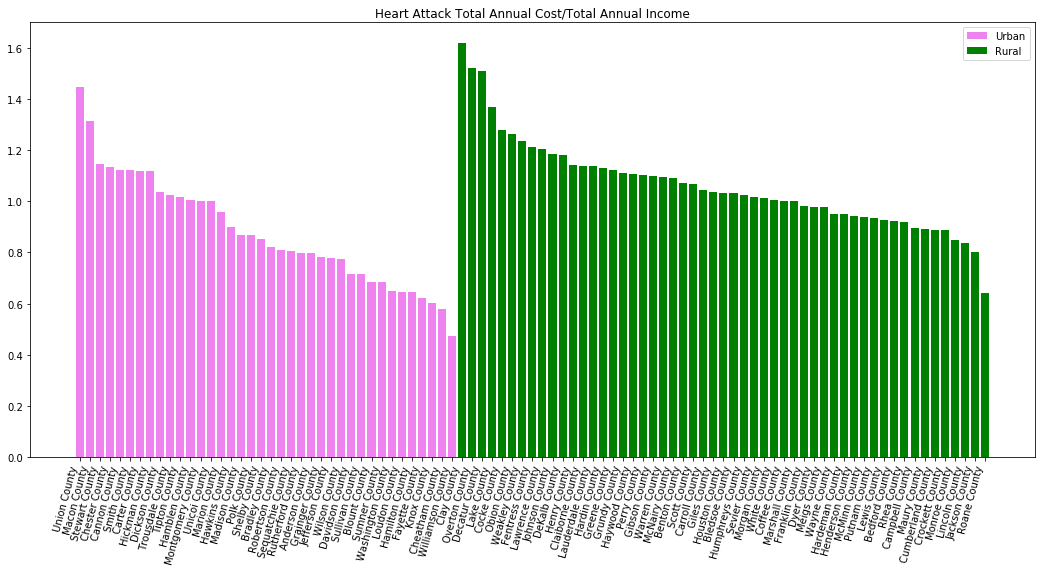

In [51]:
plt.figure(figsize = (18, 8))
plt.bar(urban_ha.county, urban_ha.cost_income_ratio, color = 'violet')
plt.bar(rural_ha.county, rural_ha.cost_income_ratio, color = 'green')
plt.title('Heart Attack Total Annual Cost/Total Annual Income')
plt.legend(['Urban', 'Rural'])
plt.xticks(rotation = 75, ha = 'right');

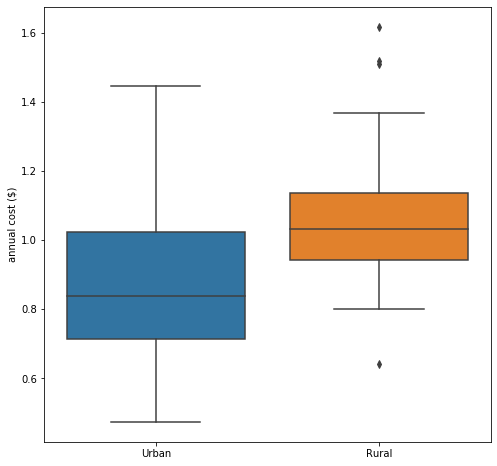

In [52]:
plt.figure(figsize = (8, 8))

sns.boxplot(x = tn_ha_costs2.urban, y = tn_ha_costs2.cost_income_ratio, order=["Urban", "Rural"])
plt.xlabel("")
plt.ylabel('annual cost ($)');

In [53]:
tn_ha_costs2.describe()

,analysis_value,avg_income,cost_income_ratio
count,91.000000,91.000000,91.000000
mean,45762.989011,48059.109890,0.986273
std,6574.670462,11859.019531,0.214552
min,30831.000000,35658.000000,0.473130
25%,41105.500000,42358.500000,0.850326
50%,45384.000000,44666.000000,1.001318
75%,49698.500000,50494.500000,1.117770
max,62641.000000,130072.000000,1.618290


In [54]:
urban_cancer = tn_cancer_costs2.loc[tn_cancer_costs2.urban == 'Urban'].sort_values('cost_income_ratio', ascending = False)
rural_cancer = tn_cancer_costs2.loc[tn_cancer_costs2.urban == 'Rural'].sort_values('cost_income_ratio', ascending = False)

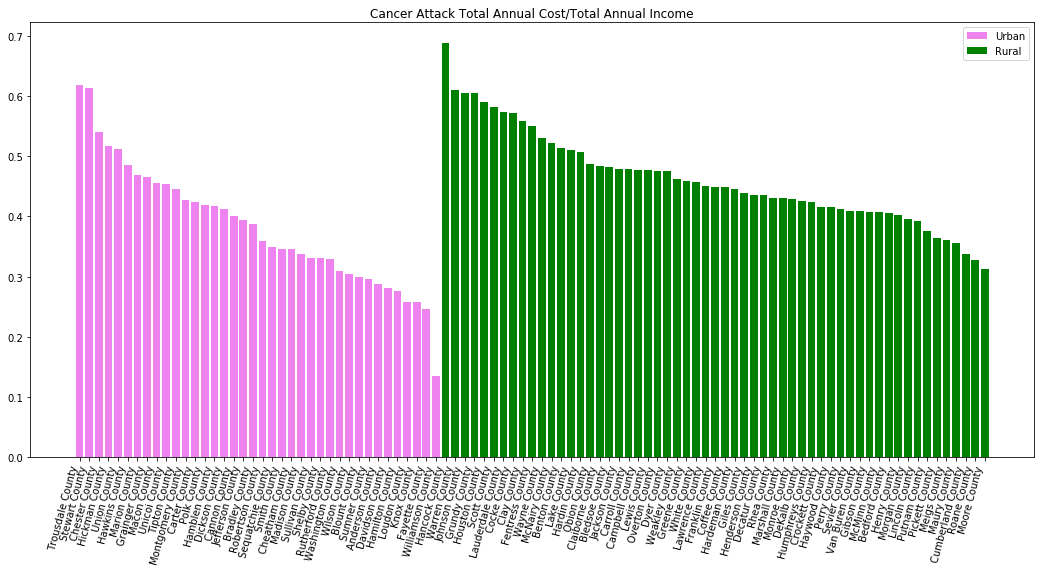

In [55]:
plt.figure(figsize = (18, 8))
plt.bar(urban_cancer.county, urban_cancer.cost_income_ratio, color = 'violet')
plt.bar(rural_cancer.county, rural_cancer.cost_income_ratio, color = 'green')
plt.title('Cancer Attack Total Annual Cost/Total Annual Income')
plt.legend(['Urban', 'Rural'])
plt.xticks(rotation = 75, ha = 'right');

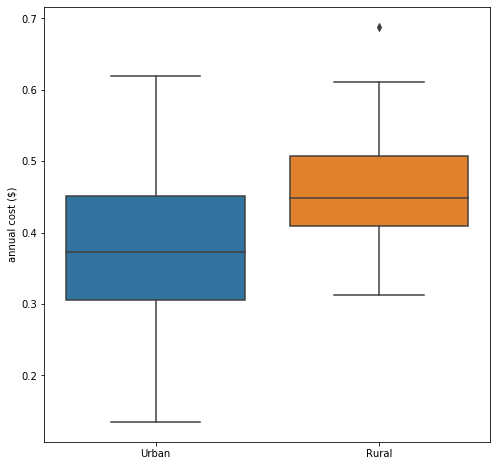

In [56]:
plt.figure(figsize = (8, 8))

sns.boxplot(x = tn_cancer_costs2.urban, y = tn_cancer_costs2.cost_income_ratio, order=["Urban", "Rural"])
plt.xlabel("")
plt.ylabel('annual cost ($)');

In [57]:
print(len(tn_cancer_costs2.analysis_value))
print(len(tn_ha_costs2.analysis_value))

95
91


In [58]:
tn_cancer_costs2.loc[~tn_cancer_costs2.county.isin(tn_ha_costs2.county)]

,county,urban,analysis_value,avg_income,cost_income_ratio
33,Hancock County,Rural,22515,32717.0,0.688174
63,Moore County,Rural,16978,54317.0,0.312572
68,Pickett County,Rural,16768,46015.0,0.364403
87,Van Buren County,Rural,16244,39762.0,0.408531


In [59]:
tn_cancer_costs3 = tn_cancer_costs2.drop(index = [12, 85, 87, 91])

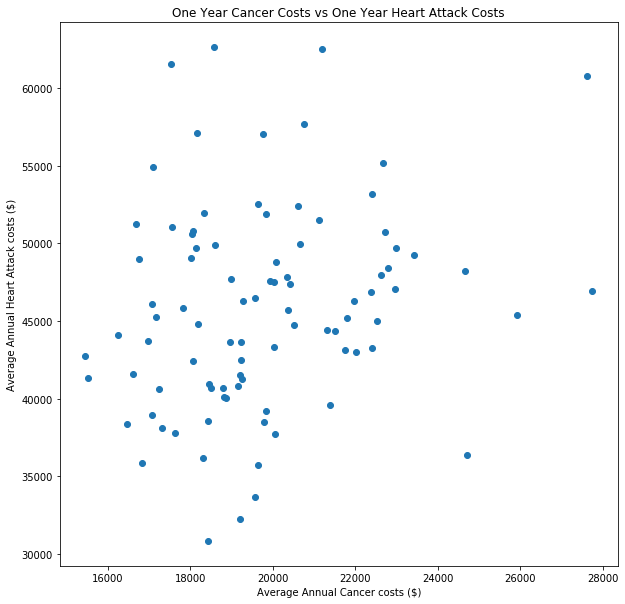

In [60]:
plt.figure(figsize = (10, 10))

plt.scatter(tn_cancer_costs3.analysis_value, tn_ha_costs2.analysis_value, marker = 'o')
plt.title('One Year Cancer Costs vs One Year Heart Attack Costs')
plt.xlabel('Average Annual Cancer costs ($)')
plt.ylabel('Average Annual Heart Attack costs ($)');

In [61]:
tn_cancer_costs3.describe()

,analysis_value,avg_income,cost_income_ratio
count,91.000000,91.000000,91.000000
mean,19783.670330,48096.472527,0.429553
std,2459.718105,11954.194298,0.098889
min,15454.000000,32717.000000,0.134748
25%,18103.500000,42358.500000,0.359449
50%,19272.000000,45102.000000,0.426669
75%,21249.000000,50851.000000,0.480751
max,27740.000000,130072.000000,0.688174


In [62]:
tn_ha_costs2.describe()

,analysis_value,avg_income,cost_income_ratio
count,91.000000,91.000000,91.000000
mean,45762.989011,48059.109890,0.986273
std,6574.670462,11859.019531,0.214552
min,30831.000000,35658.000000,0.473130
25%,41105.500000,42358.500000,0.850326
50%,45384.000000,44666.000000,1.001318
75%,49698.500000,50494.500000,1.117770
max,62641.000000,130072.000000,1.618290


### Week 5 homework:

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

#### logistic regression model for myocardial infarction costs
create target column (1 for cost-income ratio above the mean 0 if at or below the mean)
encode the urban column
split train/test
use urban column to predict

In [64]:
# create target variable
ha_cost_income_ratio_mean = tn_ha_costs2.cost_income_ratio.mean()
tn_ha_costs2['cost_ratio_above_mean'] = [1 if ratio > ha_cost_income_ratio_mean else 0 for ratio in tn_ha_costs2.cost_income_ratio]

In [65]:
tn_ha_costs2.cost_ratio_above_mean.value_counts(normalize = True)

1    0.527473
0    0.472527
Name: cost_ratio_above_mean, dtype: float64

In [66]:
tn_ha_costs2.head(2)

,county,urban,analysis_value,avg_income,cost_income_ratio,cost_ratio_above_mean
0,Anderson County,Urban,42749,53617.0,0.797303,0
1,Bedford County,Rural,43661,47308.0,0.922909,0


In [67]:
# encode urban/rural
tn_ha_costs2 = pd.get_dummies(tn_ha_costs2, columns = ['urban'], drop_first = True)
tn_ha_costs2.head(2)

,county,analysis_value,avg_income,cost_income_ratio,cost_ratio_above_mean,urban_Urban
0,Anderson County,42749,53617.0,0.797303,0,1
1,Bedford County,43661,47308.0,0.922909,0,0


In [68]:
X = tn_ha_costs2[['urban_Urban']]
y = tn_ha_costs2.cost_ratio_above_mean

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 99)


In [70]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
y_pred = logistic_model.predict(X_test)

In [72]:
print(metrics.accuracy_score(y_test, y_pred))

0.6956521739130435


#### the naive model (predicting the cost-income ratio above the mean for all cases) would have accuracy .527473

In [73]:
print('                 Pred Below Mean:  Pred Above Mean:')
print('    Actual Below Mean:    ', metrics.confusion_matrix(y_test, y_pred)[0])
print('    Actual Above Mean:   ', metrics.confusion_matrix(y_test, y_pred)[1])

                 Pred Below Mean:  Pred Above Mean:
    Actual Below Mean:     [7 4]
    Actual Above Mean:    [3 9]


In [74]:
y_pred_prob = logistic_model.predict_proba(X_test)[:,1]
print('Area Under Curve:', metrics.roc_auc_score(y_test, y_pred_prob))

Area Under Curve: 0.6931818181818181


#### Let's add another predictor - the Health Factors z-score from the county health rankings: Robert Wood Johnson Foundation

#### let's see if health_factors and tn_ha_costs2 can be merged as is

### Week 6 task

#### Think about other potential features that might explain cost disparities. Can you find additional data that may improve your classifier? The number of healthcare providers in a county, the number of healthcare facilities in a county, unemployment rates, or the per-person-income (which can be approximated using the number of exemptions in the IRS data) are potential features.

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#import graphviz
from IPython.display import SVG

In [76]:
tn_cancer_costs.head(2)

,county,urban,analysis_value
2396,Anderson County,Urban,15454
2397,Bedford County,Rural,19219


In [77]:
income_county_agg.head(2)

,county,income_bucket,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp,avg_income
94,Williamson County,36,103130,39860,54520,6880,226210,79870,24130,13101310,102890,13383074,1430,5125,130072.0
18,Davidson County,36,338340,188690,92280,49720,592430,179250,61720,23487039,337150,23947130,4560,15744,71028.0


In [78]:
tn_cancer_irs_merge = pd.merge(tn_cancer_costs, income_county_agg, on= 'county', how = 'left')
tn_cancer_irs_merge.head(2)

,county,urban,analysis_value,income_bucket,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp,avg_income
0,Anderson County,Urban,15454,36,34290,14990,14030,4550,65950,19620,9670,1807309,34140,1830482,700,2452,53617.0
1,Bedford County,Rural,19219,36,20920,8600,8010,3910,43550,15790,4430,971152,20840,985909,410,1023,47308.0


In [79]:
# encode urban/rural
tn_cancer_irs_merge_dummies = pd.get_dummies(tn_cancer_irs_merge, columns = ['urban'], drop_first = True)
tn_cancer_irs_merge_dummies.head(2)

,county,analysis_value,income_bucket,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp,avg_income,urban_Urban
0,Anderson County,15454,36,34290,14990,14030,4550,65950,19620,9670,1807309,34140,1830482,700,2452,53617.0,1
1,Bedford County,19219,36,20920,8600,8010,3910,43550,15790,4430,971152,20840,985909,410,1023,47308.0,0


In [80]:
X = tn_cancer_irs_merge_dummies.drop([ 'county', 'analysis_value','avg_income','total_inc_amt','urban_Urban'], axis = 1)
y = tn_cancer_irs_merge_dummies.urban_Urban

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 321)




In [82]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [83]:
y_pred_train = forest.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_train))

0.9859154929577465


In [84]:
y_pred = forest.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8333333333333334


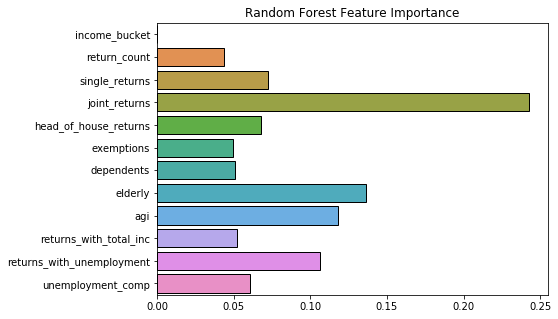

In [85]:
fig, ax = plt.subplots(figsize = (7,5))
sns.barplot(x = forest.feature_importances_, y = list(X.columns), ax = ax, edgecolor = 'black')
plt.title('Random Forest Feature Importance');

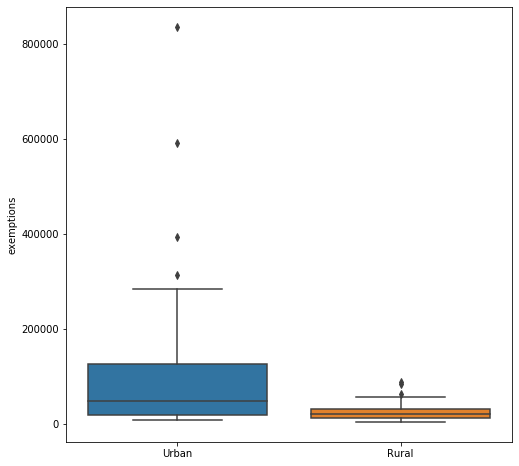

In [86]:
plt.figure(figsize = (8, 8))

sns.boxplot(x = tn_cancer_irs_merge.urban, y = tn_cancer_irs_merge.exemptions, order=["Urban", "Rural"])
plt.xlabel("")
plt.ylabel('exemptions');

## Cancer data test parameters

In [87]:
health_rankings = pd.read_excel('../data/2018 County Health Rankings Tennessee Data - v3.xls',
                                sheet_name = 'Outcomes & Factors SubRankings')

In [88]:
health_rankings.head(2)

,county,Length of life,Quality of life,Health behaviors,Clinical care,Social economic factors,Physical environment
0,Anderson,-0.098873,-0.168777,-0.09647,-0.181846,-0.17920,0.033564
1,Bedford,-0.203749,0.041025,-0.00584,0.110036,-0.08485,0.046038


In [89]:
tn_cancer_costs2.head(2)


,county,urban,analysis_value,avg_income,cost_income_ratio
0,Anderson County,Urban,15454,53617.0,0.288229
1,Bedford County,Rural,19219,47308.0,0.406253


In [90]:
tn_cancer_costs2.county = tn_cancer_costs2.county.str[0:-7]

In [91]:
tn_cancer_costs2.head(2)

,county,urban,analysis_value,avg_income,cost_income_ratio
0,Anderson,Urban,15454,53617.0,0.288229
1,Bedford,Rural,19219,47308.0,0.406253


In [92]:
cancer_with_health_factors =pd.merge(health_rankings, tn_cancer_costs2, on = 'county', how = 'outer')
cancer_with_health_factors.head(2)

,county,Length of life,Quality of life,Health behaviors,Clinical care,Social economic factors,Physical environment,urban,analysis_value,avg_income,cost_income_ratio
0,Anderson,-0.098873,-0.168777,-0.09647,-0.181846,-0.17920,0.033564,Urban,15454,53617.0,0.288229
1,Bedford,-0.203749,0.041025,-0.00584,0.110036,-0.08485,0.046038,Rural,19219,47308.0,0.406253


In [93]:
# encode urban/rural
cancer_with_health_factors_dummies = pd.get_dummies(cancer_with_health_factors, columns = ['urban'], drop_first = True)
cancer_with_health_factors_dummies.head(2)


,county,Length of life,Quality of life,Health behaviors,Clinical care,Social economic factors,Physical environment,analysis_value,avg_income,cost_income_ratio,urban_Urban
0,Anderson,-0.098873,-0.168777,-0.09647,-0.181846,-0.17920,0.033564,15454,53617.0,0.288229,1
1,Bedford,-0.203749,0.041025,-0.00584,0.110036,-0.08485,0.046038,19219,47308.0,0.406253,0


In [94]:
cancer_with_health_factors_dummies = cancer_with_health_factors_dummies.drop(['county', 'analysis_value', 'avg_income', 'cost_income_ratio'], axis=1)

In [95]:
cancer_with_health_factors_dummies.head(2)

,Length of life,Quality of life,Health behaviors,Clinical care,Social economic factors,Physical environment,urban_Urban
0,-0.098873,-0.168777,-0.09647,-0.181846,-0.17920,0.033564,1
1,-0.203749,0.041025,-0.00584,0.110036,-0.08485,0.046038,0


In [96]:
#cancer_with_health_factors = cancer_with_health_factors.loc[cancer_with_health_factors.length_of_life.notna()]

In [97]:
# create target variable
cancer_cost_income_ratio_mean = tn_cancer_costs2.cost_income_ratio.mean()
tn_cancer_costs2['cost_ratio_above_mean'] = [1 if ratio > cancer_cost_income_ratio_mean else 0 for ratio in tn_cancer_costs2.cost_income_ratio]

In [98]:
tn_cancer_costs2.cost_ratio_above_mean.value_counts(normalize = True)

0    0.505263
1    0.494737
Name: cost_ratio_above_mean, dtype: float64

In [99]:
tn_cancer_costs2.head(2)

,county,urban,analysis_value,avg_income,cost_income_ratio,cost_ratio_above_mean
0,Anderson,Urban,15454,53617.0,0.288229,0
1,Bedford,Rural,19219,47308.0,0.406253,0


In [100]:
cancer_health_factors =pd.merge(health_rankings, tn_cancer_costs2, on = 'county', how = 'left')
cancer_health_factors.head(2)

,county,Length of life,Quality of life,Health behaviors,Clinical care,Social economic factors,Physical environment,urban,analysis_value,avg_income,cost_income_ratio,cost_ratio_above_mean
0,Anderson,-0.098873,-0.168777,-0.09647,-0.181846,-0.17920,0.033564,Urban,15454,53617.0,0.288229,0
1,Bedford,-0.203749,0.041025,-0.00584,0.110036,-0.08485,0.046038,Rural,19219,47308.0,0.406253,0


In [101]:
X = cancer_health_factors.drop([ 'cost_ratio_above_mean', 'county' ,'urban', 'analysis_value', 'avg_income', 'cost_income_ratio'], axis = 1)
y = cancer_health_factors.cost_ratio_above_mean


In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 99)


In [103]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [104]:
y_pred_train = forest.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_train))

0.971830985915493


In [105]:
y_pred = forest.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.7916666666666666


In [106]:
forest = RandomForestClassifier(n_estimators = 1000, max_depth = 4, min_samples_leaf = 10)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

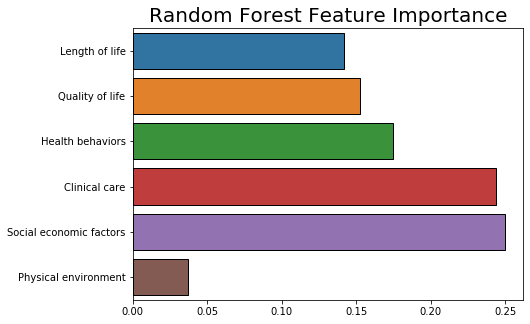

In [107]:
fig, ax = plt.subplots(figsize = (7,5))
sns.set_context(rc={'font.size': 10,
                   'axes.labelsize': 20, # X/Y labels
                   'axes.titlesize': 20, # Size of title
                   'xtick.labelsize': 20, # X ticks size
                   'ytick.labelsize': 20}) # Y ticks size
sns.barplot(x = forest.feature_importances_, y = list(X.columns), ax = ax, edgecolor = 'black')
plt.title('Random Forest Feature Importance');

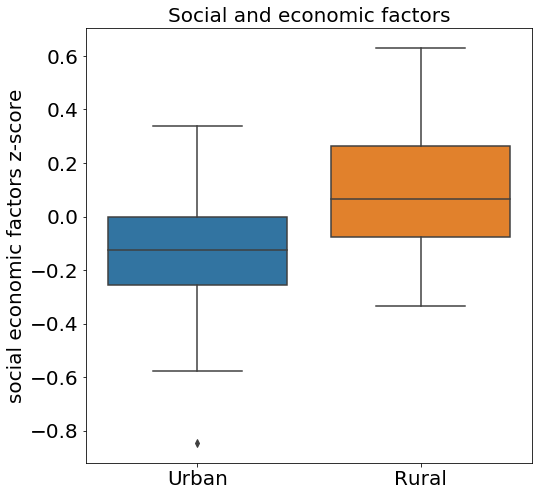

In [108]:
plt.figure(figsize = (8, 8))

sns.boxplot(x = cancer_with_health_factors.urban, y = cancer_with_health_factors['Social economic factors'] , order=["Urban", "Rural"])
plt.xlabel("")
plt.ylabel('social economic factors z-score')
plt.title ('Social and economic factors');

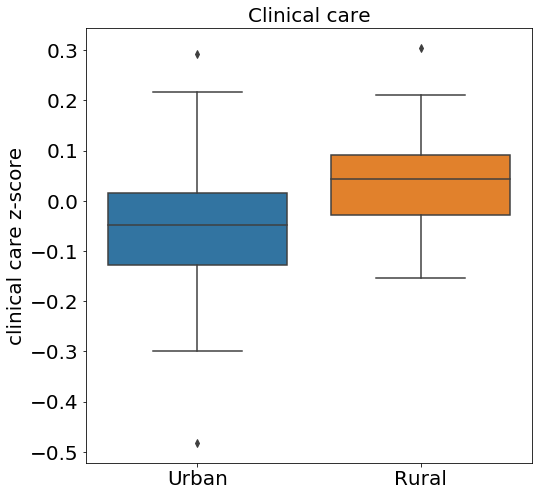

In [109]:
plt.figure(figsize = (8, 8))

sns.boxplot(x = cancer_with_health_factors.urban, y = cancer_with_health_factors['Clinical care'] , order=["Urban", "Rural"])
plt.xlabel("")
plt.ylabel('clinical care z-score')
plt.title ('Clinical care');

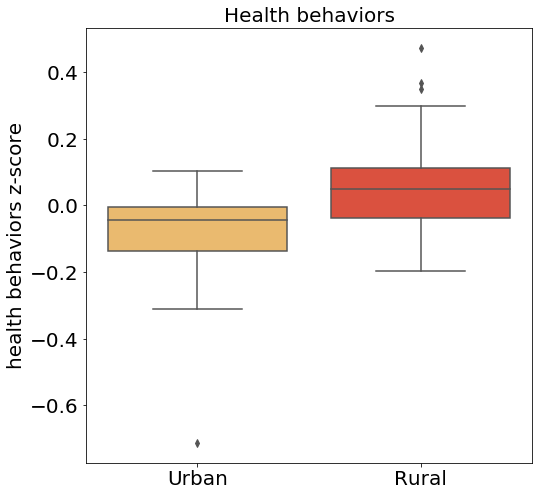

In [110]:
plt.figure(figsize = (8, 8))

sns.boxplot(x = cancer_with_health_factors.urban, y = cancer_with_health_factors['Health behaviors'] , order=["Urban", "Rural"], palette="YlOrRd")
plt.xlabel("")
plt.ylabel('health behaviors z-score')
plt.title ('Health behaviors');

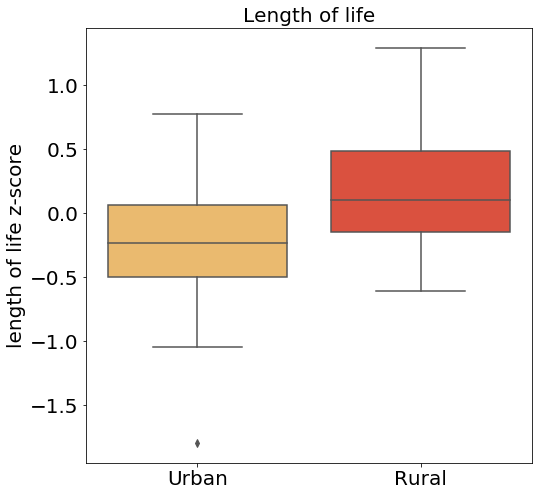

In [111]:
plt.figure(figsize = (8, 8))

sns.boxplot(x = cancer_health_factors.urban, y = cancer_health_factors['Length of life'] , order=["Urban", "Rural"], palette="YlOrRd")
plt.xlabel("")
plt.ylabel('length of life z-score')
plt.title ('Length of life');

## Choropleth data

In [112]:
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm
from matplotlib.colors import Normalize 


In [113]:
counties = gpd.read_file('../data/county/tn_counties.shp')
counties.head(2)

,AREA,PERIMETER,TNCODD_,TNCODD_ID,INDEX_NO,COUNTY,STATE,geometry
0,0.128263,1.518444,2,77,59,Stewart,TN,"POLYGON ((1364976.405478028 793944.5740065643,..."
1,0.124217,1.750500,3,81,62,Robertson,TN,"POLYGON ((1641280.781373917 842367.2746404002,..."


In [114]:
counties.columns = ['area', 'perimeter', 'tncodd', 'tncodd_id', 'index_no', 'county', 'state', 'geometry']
counties.head(2)

,area,perimeter,tncodd,tncodd_id,index_no,county,state,geometry
0,0.128263,1.518444,2,77,59,Stewart,TN,"POLYGON ((1364976.405478028 793944.5740065643,..."
1,0.124217,1.750500,3,81,62,Robertson,TN,"POLYGON ((1641280.781373917 842367.2746404002,..."


In [115]:
geo_cancer = pd.merge(left = counties, right = tn_cancer_costs2)
geo_cancer.head(2)

,area,perimeter,tncodd,tncodd_id,index_no,county,state,geometry,urban,analysis_value,avg_income,cost_income_ratio,cost_ratio_above_mean
0,0.128263,1.518444,2,77,59,Stewart,TN,"POLYGON ((1364976.405478028 793944.5740065643,...",Urban,27740,45266.0,0.612822,1
1,0.124217,1.750500,3,81,62,Robertson,TN,"POLYGON ((1641280.781373917 842367.2746404002,...",Urban,18809,52416.0,0.358841,0


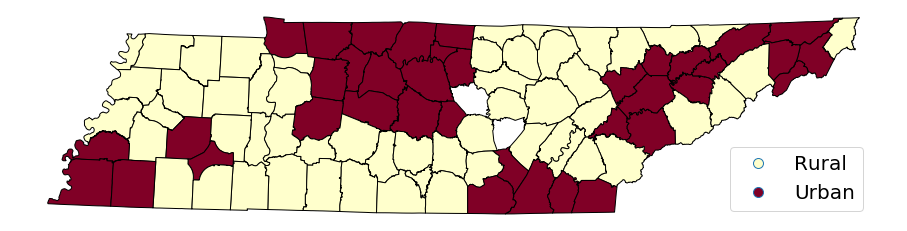

In [116]:
fig, ax = plt.subplots(figsize=(16,4))
sns.set_context(rc={'font.size': 10,
                   'axes.labelsize': 20, # X/Y labels
                   'legend.fontsize': 20,
                
                   'xtick.labelsize': 20, # X ticks size
                   'ytick.labelsize': 20}) # Y ticks size
geo_cancer.plot(column = 'urban',
                cmap = 'YlOrRd',
                edgecolor = 'black',
                legend=True,                
              ax = ax)
ax.axis('off')
ax.get_legend().set_bbox_to_anchor((0.97, 0.4));


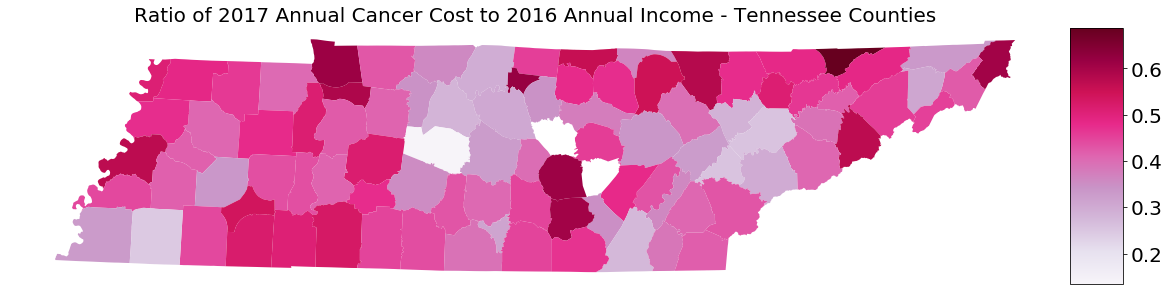

In [117]:
cmap = cm.ScalarMappable(
      norm = Normalize(geo_cancer.cost_income_ratio.min(), geo_cancer.cost_income_ratio.max()), 
      cmap = 'PuRd')
cmap.set_array([]) 

fig, ax = plt.subplots(figsize = (20, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
fig.colorbar(mappable=cmap, cax = cax)
geo_cancer.plot(ax = ax, column = 'cost_income_ratio', cmap = 'PuRd')
ax.set_title('Ratio of 2017 Annual Cancer Cost to 2016 Annual Income - Tennessee Counties')
ax.axis('off');

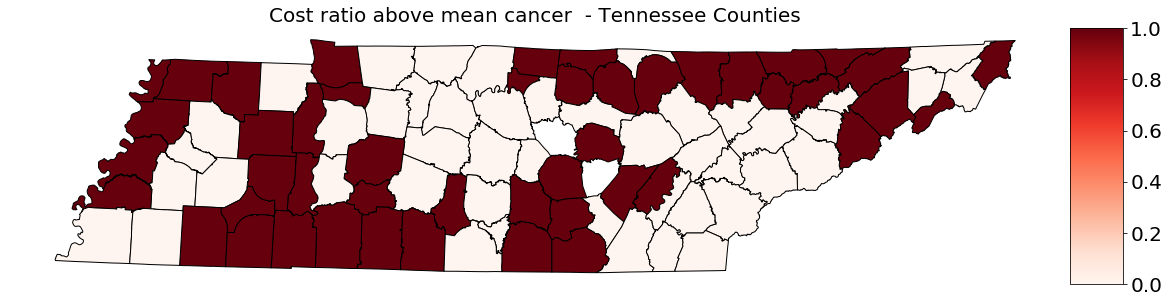

In [118]:
cmap = cm.ScalarMappable(
      norm = Normalize(geo_cancer.cost_ratio_above_mean.min(), geo_cancer.cost_ratio_above_mean.max()), 
      cmap = 'Reds')
cmap.set_array([]) 

fig, ax = plt.subplots(figsize = (20, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
fig.colorbar(mappable=cmap, cax = cax)
geo_cancer.plot(ax = ax, column = 'cost_ratio_above_mean', cmap = 'Reds', edgecolor = 'black')
ax.set_title('Cost ratio above mean cancer  - Tennessee Counties')
ax.axis('off') ;

In [119]:
tn_ha_costs2.head(2)

,county,analysis_value,avg_income,cost_income_ratio,cost_ratio_above_mean,urban_Urban
0,Anderson County,42749,53617.0,0.797303,0,1
1,Bedford County,43661,47308.0,0.922909,0,0


In [120]:
counties.head(2)

,area,perimeter,tncodd,tncodd_id,index_no,county,state,geometry
0,0.128263,1.518444,2,77,59,Stewart,TN,"POLYGON ((1364976.405478028 793944.5740065643,..."
1,0.124217,1.750500,3,81,62,Robertson,TN,"POLYGON ((1641280.781373917 842367.2746404002,..."


In [121]:
tn_ha_costs2.county = tn_ha_costs2.county.str[0:-7]
tn_ha_costs2.head(2)

,county,analysis_value,avg_income,cost_income_ratio,cost_ratio_above_mean,urban_Urban
0,Anderson,42749,53617.0,0.797303,0,1
1,Bedford,43661,47308.0,0.922909,0,0


In [122]:
geo_ha = pd.merge(counties, tn_ha_costs2, on = 'county', how = 'outer')
geo_ha.head(2)


,area,perimeter,tncodd,tncodd_id,index_no,county,state,geometry,analysis_value,avg_income,cost_income_ratio,cost_ratio_above_mean,urban_Urban
0,0.128263,1.518444,2.0,77.0,59.0,Stewart,TN,"POLYGON ((1364976.405478028 793944.5740065643,...",51882.0,45266.0,1.146158,1.0,1.0
1,0.124217,1.750500,3.0,81.0,62.0,Robertson,TN,"POLYGON ((1641280.781373917 842367.2746404002,...",42519.0,52416.0,0.811184,0.0,1.0


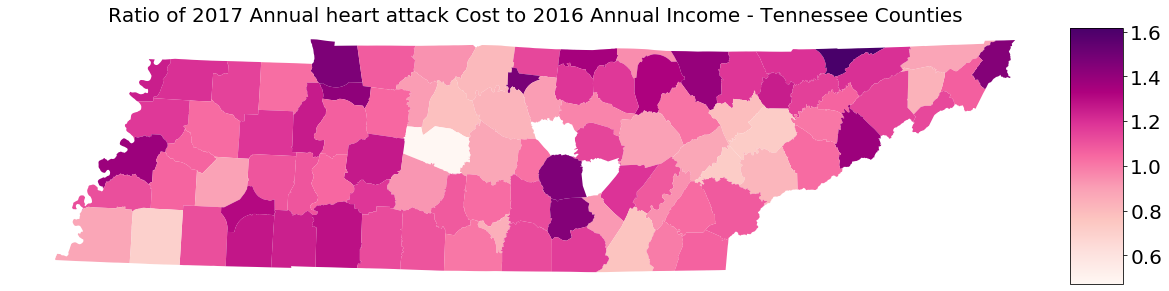

In [123]:
cmap = cm.ScalarMappable(
      norm = Normalize(geo_ha.cost_income_ratio.min(), geo_ha.cost_income_ratio.max()), 
      cmap = 'RdPu')
cmap.set_array([]) 

fig, ax = plt.subplots(figsize = (20, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
fig.colorbar(mappable=cmap, cax = cax)
geo_cancer.plot(ax = ax, column = 'cost_income_ratio', cmap = 'RdPu')
ax.set_title('Ratio of 2017 Annual heart attack Cost to 2016 Annual Income - Tennessee Counties')
ax.axis('off');

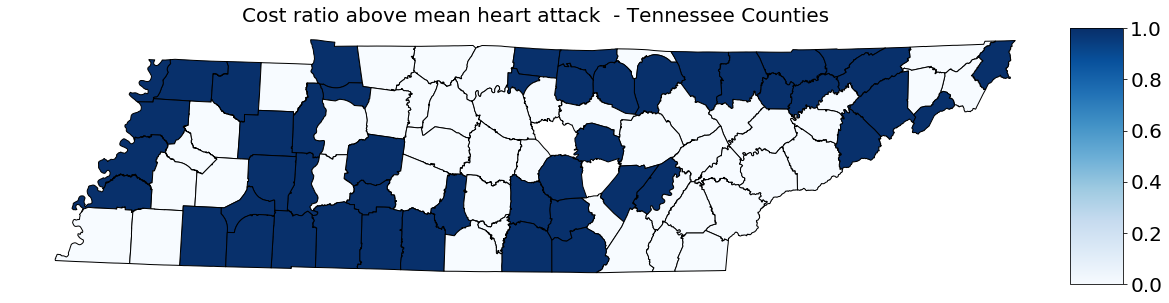

In [124]:
cmap = cm.ScalarMappable(
      norm = Normalize(geo_ha.cost_ratio_above_mean.min(), geo_ha.cost_ratio_above_mean.max()), 
      cmap = 'Blues')
cmap.set_array([]) 

fig, ax = plt.subplots(figsize = (20, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
fig.colorbar(mappable=cmap, cax = cax)
geo_cancer.plot(ax = ax, column = 'cost_ratio_above_mean', cmap = 'Blues', edgecolor = 'black')
ax.set_title('Cost ratio above mean heart attack  - Tennessee Counties')
ax.axis('off') ;

In [125]:
#cancer_with_health_factors2 =pd.merge(health_rank2, tn_cancer_costs2, on = 'county', how = 'outer')
#cancer_with_health_factors2.head(2)


In [126]:
#geo_cancer_factors = pd.merge (left = counties, right = cancer_with_health_factors2 )
#geo_cancer_factors.head(2)

In [127]:
#cmap = cm.ScalarMappable(
#      norm = Normalize(geo_cancer_factors.social_economic_factors.min(), geo_cancer_factors.social_economic_factors.max()), 
#      cmap = 'YlOrBr')
#cmap.set_array([]) 

#fig, ax = plt.subplots(figsize = (20, 10))
#divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="5%", pad=0.1)
#fig.colorbar(mappable=cmap, cax = cax)
#geo_cancer_factors.plot(ax = ax, column = 'social_economic_factors', cmap = 'YlOrBr')
#ax.set_title('Social and economic factors z-score - Tennessee Counties')
#ax.axis('off');

## More parameters

In [128]:
health_rankings2 = pd.read_excel('../data/2018 County Health Rankings Tennessee Data - v3.xls', 
                                sheet_name = 'Ranked Measure Data')


In [129]:
health_rankings2.head()

,county,Premature death,Poor or fair health,Poor physical health days,Poor mental health days,Low birthweight,Adult smoking,Adult obesity,Food environment index,Physical inactivity,...,Income inequality,Children in single parent households,Social associations,Violent crime,Injury deaths,Air pollution,Drinking water violations,Severe housing problems,Driving alone to work,Long commute
0,Anderson,-0.197746,-0.509523,-0.473361,-0.345931,-0.179477,-0.684053,-0.929617,0.343092,0.392063,...,0.644706,1.072621,-1.281038,-0.311476,0.251900,1.764502,-0.562212,-0.410335,0.860575,-0.549772
1,Bedford,-0.407498,0.453757,-0.095082,-0.202414,0.126996,-0.359034,-0.591089,-0.410428,0.091692,...,-1.098432,0.560237,0.563093,-0.096578,-0.270418,0.462178,1.759967,0.758064,-1.041853,-0.383997
2,Benton,1.651802,0.320910,1.073317,1.335083,-0.610566,0.242617,0.509129,0.343092,0.752508,...,1.402150,-0.212758,-0.873195,-0.866646,3.000000,-1.026192,-0.562212,0.477849,-0.206014,-0.954999
3,Bledsoe,-1.122412,0.644745,0.814403,0.046077,-1.934901,1.639488,-0.591089,-0.410428,0.452137,...,1.383617,0.260598,1.736836,-1.343944,-0.985810,-0.840146,-0.562212,1.156690,-1.660449,1.347430
4,Blount,-1.058765,-1.441777,-0.780233,-0.957957,-0.758815,-1.469051,-0.040980,0.041684,-1.259976,...,-0.507917,-1.054631,-0.195165,-0.354925,-0.859358,0.648224,-0.562212,-0.004989,0.268290,-0.218222


In [130]:
tn_cancer_costs2.head(2)

,county,urban,analysis_value,avg_income,cost_income_ratio,cost_ratio_above_mean
0,Anderson,Urban,15454,53617.0,0.288229,0
1,Bedford,Rural,19219,47308.0,0.406253,0


In [131]:
cancer_health_factors2 = pd.merge(health_rankings2, tn_cancer_costs2, on = 'county', how = 'left')
cancer_health_factors2.head(2)

,county,Premature death,Poor or fair health,Poor physical health days,Poor mental health days,Low birthweight,Adult smoking,Adult obesity,Food environment index,Physical inactivity,...,Air pollution,Drinking water violations,Severe housing problems,Driving alone to work,Long commute,urban,analysis_value,avg_income,cost_income_ratio,cost_ratio_above_mean
0,Anderson,-0.197746,-0.509523,-0.473361,-0.345931,-0.179477,-0.684053,-0.929617,0.343092,0.392063,...,1.764502,-0.562212,-0.410335,0.860575,-0.549772,Urban,15454,53617.0,0.288229,0
1,Bedford,-0.407498,0.453757,-0.095082,-0.202414,0.126996,-0.359034,-0.591089,-0.410428,0.091692,...,0.462178,1.759967,0.758064,-1.041853,-0.383997,Rural,19219,47308.0,0.406253,0


In [132]:
X = cancer_health_factors2.drop(['cost_ratio_above_mean','county','analysis_value', 'avg_income', 'cost_income_ratio' , 'urban'], axis = 1)
y = cancer_health_factors2.cost_ratio_above_mean

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 99)

In [134]:
forest = RandomForestClassifier(n_estimators = 1000, max_depth = 4, min_samples_leaf = 10)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [135]:
y_pred_train = forest.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_train))

0.8450704225352113


In [136]:
y_pred = forest.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8333333333333334


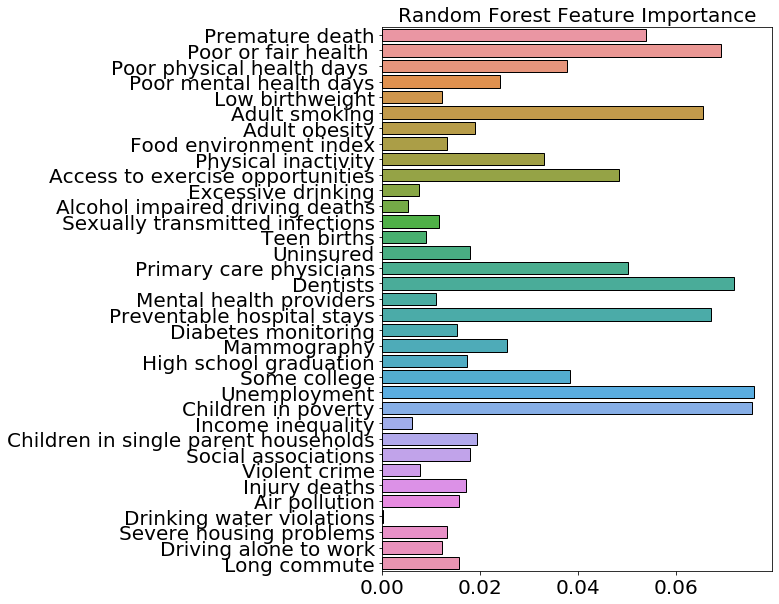

In [137]:
fig, ax = plt.subplots(figsize = (7,10))
sns.barplot(x = forest.feature_importances_, y = list(X.columns), ax = ax, edgecolor = 'black')
plt.title('Random Forest Feature Importance');

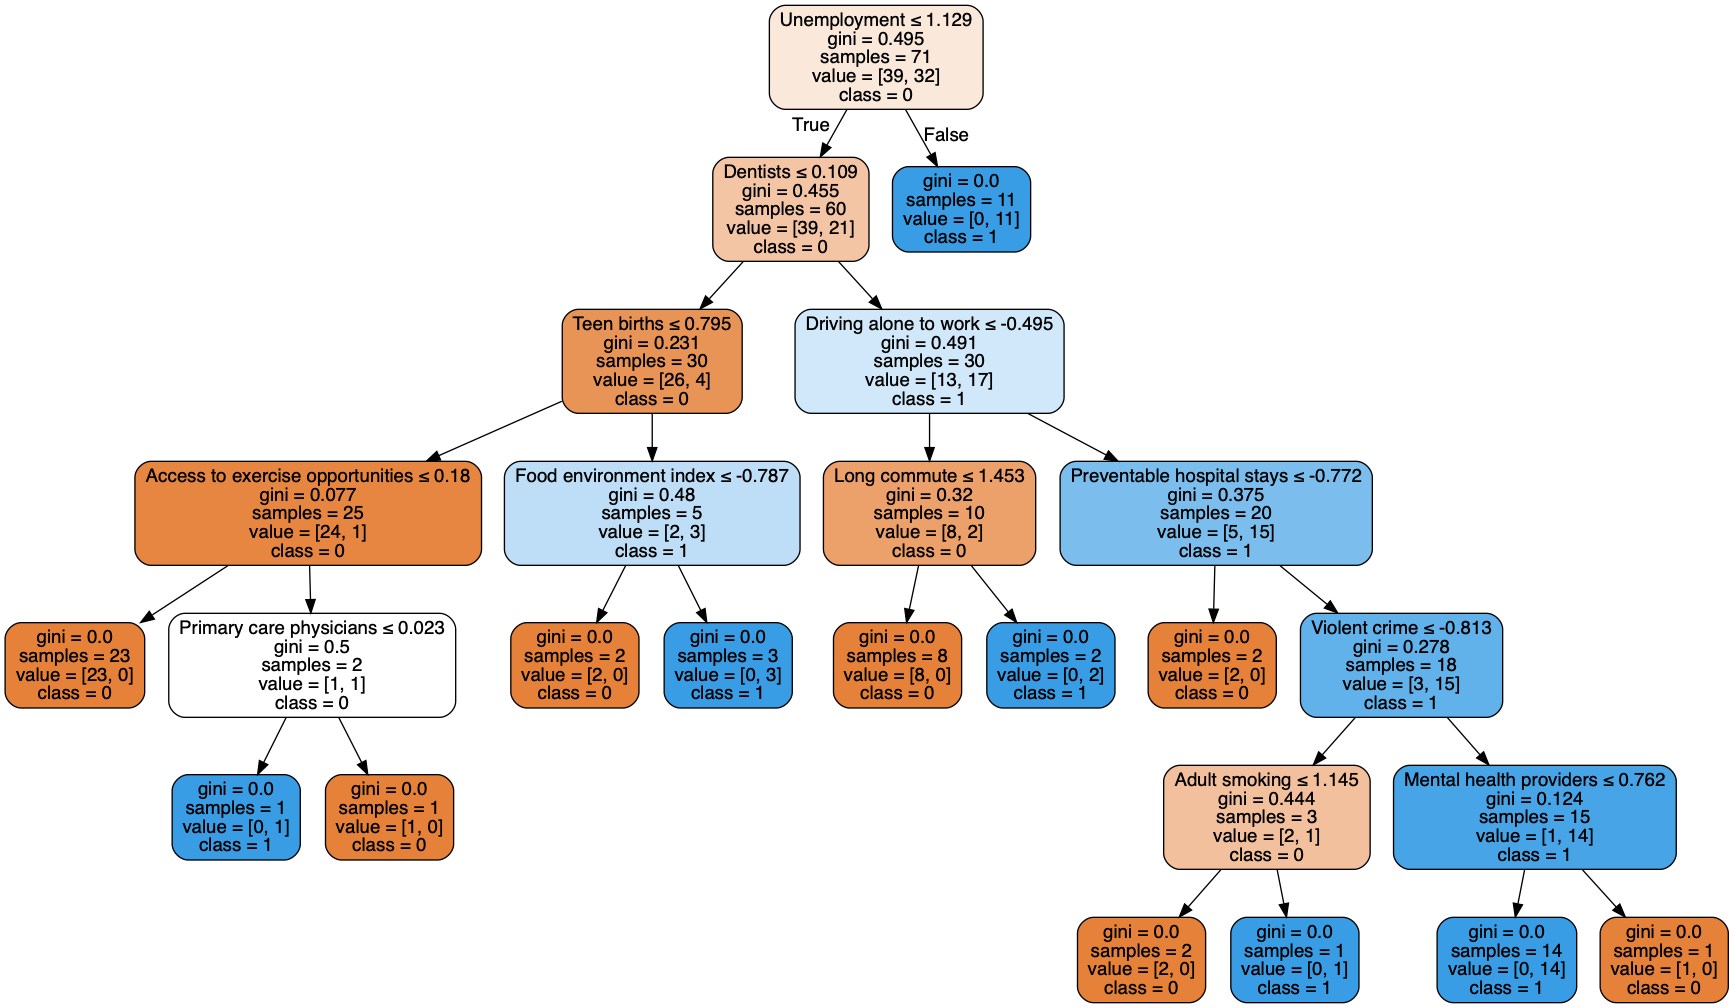

In [138]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
names = list(X.columns)
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True,
               feature_names = names,
               class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('nameoffile.png')
Image(graph.create_png())

In [268]:
X = cancer_health_factors2.drop(['Preventable hospital stays','Mental health providers','Alcohol impaired driving deaths','Sexually transmitted infections','Poor mental health days', 'Food environment index', 'Excessive drinking', 'Some college', 'Premature death','Dentists','Social associations','Children in single parent households','Income inequality','Diabetes monitoring','Children in poverty','Low birthweight', 'Air pollution', 'Violent crime', 'Injury deaths', 'Drinking water violations', 'Severe housing problems', 'Driving alone to work', 'Long commute','Teen births', 'High school graduation', 'Children in poverty','cost_ratio_above_mean','county','analysis_value', 'avg_income', 'cost_income_ratio' , 'urban'], axis = 1)
y = cancer_health_factors2.cost_ratio_above_mean

In [274]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 99)


In [275]:
forest = RandomForestClassifier(n_estimators = 1000, max_depth = 4, min_samples_leaf = 10)
forest.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [276]:
y_pred_train = forest.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_train))


0.8028169014084507


In [277]:
y_pred = forest.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))


0.7083333333333334


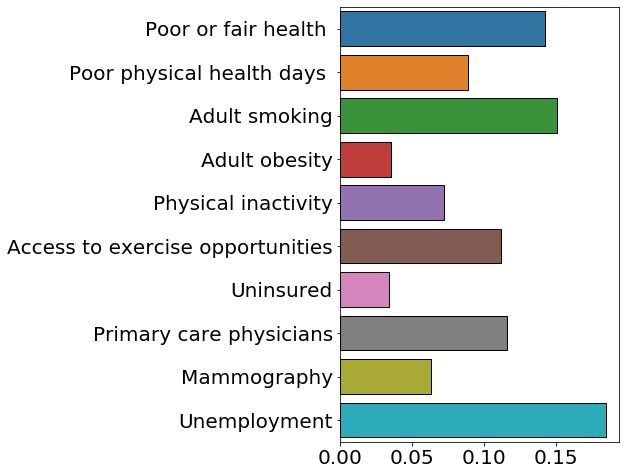

In [278]:
fig, ax = plt.subplots(figsize = (5,8))
sns.set_context(rc={'font.size': 10,
                   'axes.labelsize': 20, # X/Y labels
                   'legend.fontsize': 15,
                   'axes.titlesize': 20, # Size of title
                   'xtick.labelsize': 20, # X ticks size
                   'ytick.labelsize': 20}) # Y ticks size
sns.barplot(x = forest.feature_importances_, y = list(X.columns), ax = ax, edgecolor = 'black')
#plt.title('Random Forest Feature Importance');
plt.savefig("Random Forest Feature Importance", dpi=1200, bbox_inches='tight');

In [279]:
print('                 Pred Below Mean:  Pred Above Mean:')
print('    Actual Below Mean:    ', metrics.confusion_matrix(y_test, y_pred)[0])
print('    Actual Above Mean:   ', metrics.confusion_matrix(y_test, y_pred)[1])

                 Pred Below Mean:  Pred Above Mean:
    Actual Below Mean:     [7 2]
    Actual Above Mean:    [ 5 10]


Confusion matrix, without normalization
[[ 7  2]
 [ 5 10]]


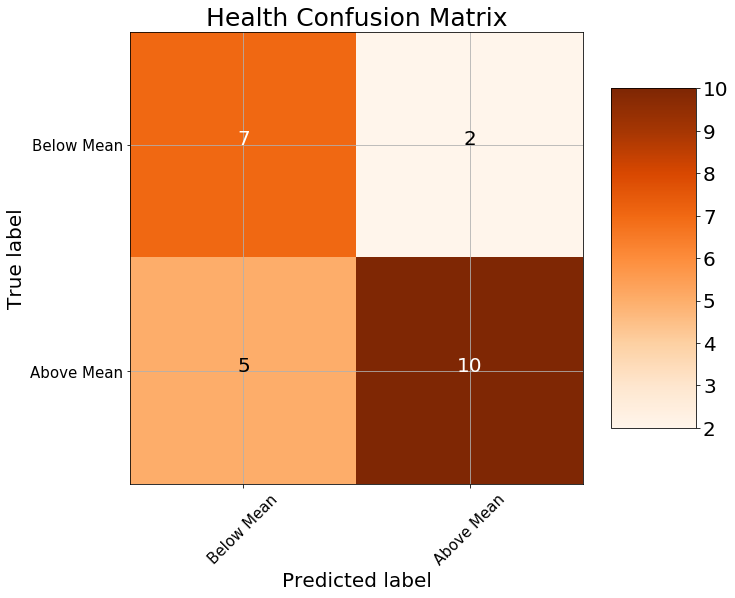

In [280]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Oranges):
   """
   #This function prints and plots the confusion matrix.
   Normalization can be applied by setting normalize=True.
   Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
   """
   if normalize:
       cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
       print("Normalized confusion matrix")
   else:
       print('Confusion matrix, without normalization')
   print(cm)
   plt.figure(figsize = (10, 10))
   plt.imshow(cm, interpolation='nearest', cmap=cmap)
   plt.title(title, size = 25)
   plt.colorbar(aspect=4)
   tick_marks = np.arange(len(classes))
   plt.xticks(tick_marks, classes, rotation=45, size = 15)
   plt.yticks(tick_marks, classes, size = 15)
   fmt = '.2f' if normalize else 'd'
   thresh = cm.max() / 2.
   # Labeling the plot
   for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
       plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
   plt.grid(None)
   plt.tight_layout()
   plt.ylabel('True label', size = 20)
   plt.xlabel('Predicted label', size = 20)

# Visualise classical Confusion Matrix
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)
# Visualize it as a heatmap
import seaborn
#seaborn.heatmap(CM)
#plt.show()
plot_confusion_matrix(CM, classes = ['Below Mean', 'Above Mean'],
                     title = 'Health Confusion Matrix')
plt.savefig("Health confusion matrix cancer", dpi=1200, bbox_inches='tight');

In [281]:
# Set the style
#plt.style.use('fivethirtyeight')

# Set up the plotting layout
#fig, ((ax1, ax2)) = plt.subplots(ncols=2, figsize = (10,5))


# Unemployment
#ax1.plot(cancer_health_factors2['Unemployment'])
#ax1.set_xlabel(''); ax1.set_ylabel('z-score'); ax1.set_title('Unemployment')

# Smoking
#ax2.plot(cancer_health_factors2['Adult smoking'])
#ax2.set_xlabel(''); ax1.set_ylabel('z-score'); ax2.set_title('Adult smoking')

In [148]:
# Labels are the values we want to predict
#labels = np.array(cancer_health_factors2['Unemployment'])

# Dataframe with true values and dates
#true_data = pd.DataFrame(data = { 'Unemployment': labels})


# Use the forest's predict method on the test data
#predictions = forest.predict(test_features)

# Dataframe with predictions and dates
#predictions_data = pd.DataFrame(data = {'prediction': y_pred})


In [149]:


# Plot the actual values
#plt.plot(true_data['Unemployment'], 'b-', label = 'actual')

# Plot the predicted values
#plt.plot(predictions_data['prediction'], 'ro', label = 'prediction')
#plt.xticks(rotation = '60'); 
#plt.legend()


In [150]:
# Labels are the values we want to predict
#labels = np.array(cancer_health_factors2['Adult smoking'])

# Dataframe with true values and dates
#true_data = pd.DataFrame(data = { 'Adult smoking': labels})


# Use the forest's predict method on the test data
#predictions = forest.predict(test_features)

# Dataframe with predictions and dates
#predictions_data = pd.DataFrame(data = {'prediction': y_pred})

In [151]:

# Plot the actual values
#plt.plot(true_data['Adult smoking'], 'b-', label = 'actual')

# Plot the predicted values
#plt.plot(predictions_data['prediction'], 'ro', label = 'prediction')
#plt.xticks(rotation = '60'); 
#plt.legend()

In [152]:
tn_cancer_clinical_care = cancer_health_factors2[['county','urban','Uninsured', 'Primary care physicians', 'Dentists', 'Preventable hospital stays','Mental health providers', 'Diabetes monitoring', 'Mammography', 'cost_ratio_above_mean' ]]
tn_cancer_clinical_care.head(2)

,county,urban,Uninsured,Primary care physicians,Dentists,Preventable hospital stays,Mental health providers,Diabetes monitoring,Mammography,cost_ratio_above_mean
0,Anderson,Urban,-1.310826,-0.599290,-2.017304,-0.900538,-0.284185,-0.576488,-0.634883,0
1,Bedford,Rural,2.608988,0.422541,0.521947,-0.116034,-0.024865,-0.249580,-1.040764,0


In [153]:
#sns.set(style='ticks', color_codes=True)
#sns.pairplot(tn_cancer_clinical_care, hue='urban',plot_kws=dict(s=80, edgecolor="white", linewidth=2.5));

In [154]:
#tn_cancer_health_behaviors = cancer_health_factors2[['county','urban','adult_smoking', 'adult_obesity', 'premature_death', 'poor_mental_health_days', 'food_environment_index', 'access_to_exercise_opportunities', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'sexually_transmitted_infections', 'physical_inactivity' ,'cost_ratio_above_mean' ]]
#tn_cancer_health_behaviors.head(2)

In [155]:
#sns.set(style='ticks', color_codes=True)
#sns.pairplot(tn_cancer_health_behaviors, hue='urban',plot_kws=dict(s=80, edgecolor="white", linewidth=2.5));

In [156]:
#tn_cancer_social_eco = cancer_health_factors2[['county','urban','high_school_graduation', 'some_college', 'unemployment', 'children_in_poverty', 'income_inequality', 'children_in_single_parent_households', 'social_associations', 'violent_crime', 'injury_deaths' ,'cost_ratio_above_mean' ]]
#tn_cancer_social_eco.head(2)

In [157]:
#sns.set(style='ticks', color_codes=True)
#sns.pairplot(tn_cancer_social_eco, hue='urban',plot_kws=dict(s=80, edgecolor="white", linewidth=2.5));

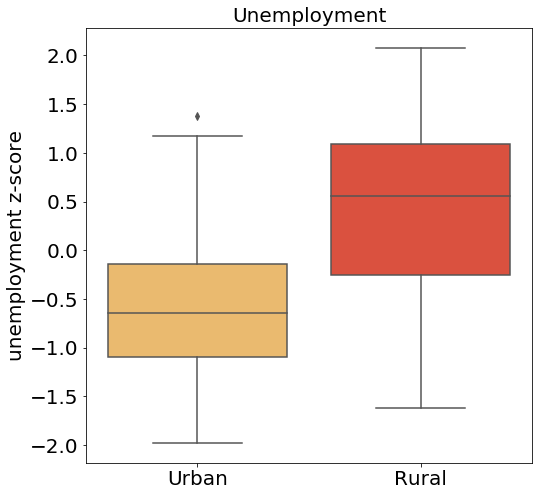

In [158]:
plt.figure(figsize = (8, 8))

sns.boxplot(x = cancer_health_factors2.urban, y = cancer_health_factors2.Unemployment, order=["Urban", "Rural"], palette="YlOrRd")
plt.xlabel("")
plt.ylabel('unemployment z-score')
plt.title ('Unemployment');

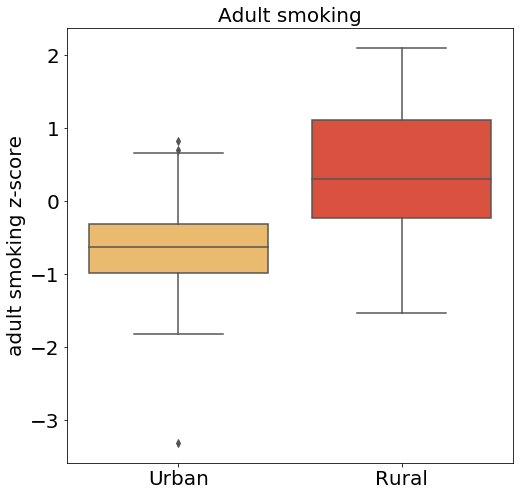

In [159]:
plt.figure(figsize = (8, 8))

sns.boxplot(x = cancer_health_factors2.urban, y = cancer_health_factors2['Adult smoking'], order=["Urban", "Rural"], palette="YlOrRd")
plt.xlabel("")
plt.ylabel('adult smoking z-score')
plt.title ('Adult smoking');

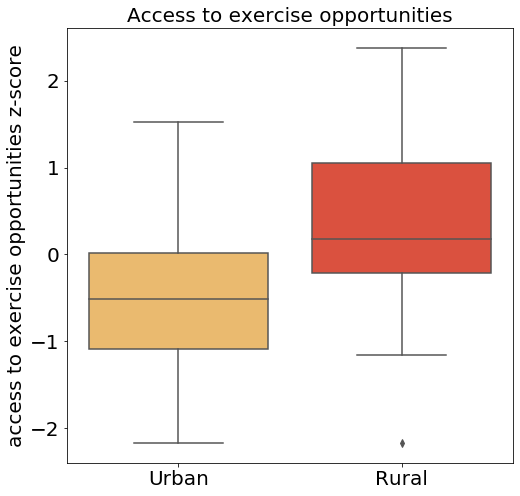

In [160]:
plt.figure(figsize = (8, 8))

sns.boxplot(x = cancer_health_factors2.urban, y = cancer_health_factors2['Access to exercise opportunities'], order=["Urban", "Rural"], palette="YlOrRd")
plt.xlabel("")
plt.ylabel('access to exercise opportunities z-score')
plt.title ('Access to exercise opportunities');

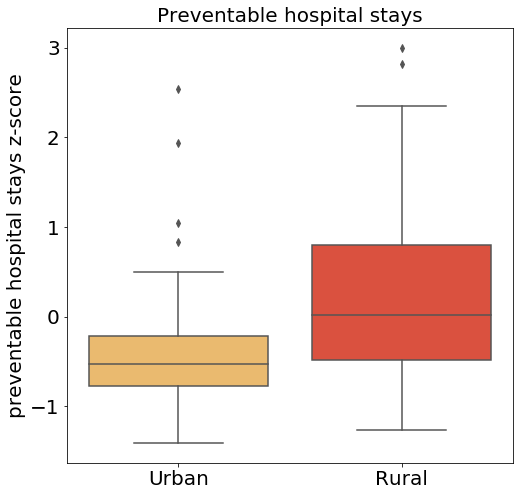

In [161]:
plt.figure(figsize = (8, 8))

sns.boxplot(x = cancer_health_factors2.urban, y = cancer_health_factors2['Preventable hospital stays'] , order=["Urban", "Rural"], palette="YlOrRd")
plt.xlabel("")
plt.ylabel('preventable hospital stays z-score')
plt.title ('Preventable hospital stays');

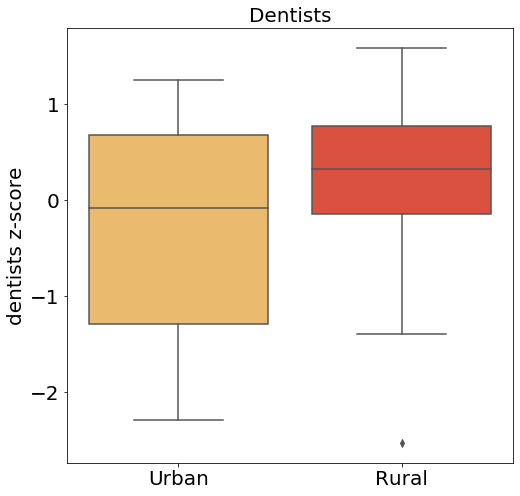

In [162]:
plt.figure(figsize = (8, 8))

sns.boxplot(x = cancer_health_factors2.urban, y = cancer_health_factors2.Dentists , order=["Urban", "Rural"], palette="YlOrRd")
plt.xlabel("")
plt.ylabel('dentists z-score')
plt.title ('Dentists');

In [163]:
geo_cancer_factors2 = pd.merge (left = counties, right = cancer_health_factors2 )
geo_cancer_factors2.head(2)

,area,perimeter,tncodd,tncodd_id,index_no,county,state,geometry,Premature death,Poor or fair health,...,Air pollution,Drinking water violations,Severe housing problems,Driving alone to work,Long commute,urban,analysis_value,avg_income,cost_income_ratio,cost_ratio_above_mean
0,0.128263,1.518444,2,77,59,Stewart,TN,"POLYGON ((1364976.405478028 793944.5740065643,...",-0.066413,-0.728054,...,-0.468053,-0.562212,0.308637,0.469632,1.697399,Urban,27740,45266.0,0.612822,1
1,0.124217,1.750500,3,81,62,Robertson,TN,"POLYGON ((1641280.781373917 842367.2746404002,...",-0.804665,-1.342066,...,1.392409,-0.562212,-0.808374,-0.707336,0.997461,Urban,18809,52416.0,0.358841,0


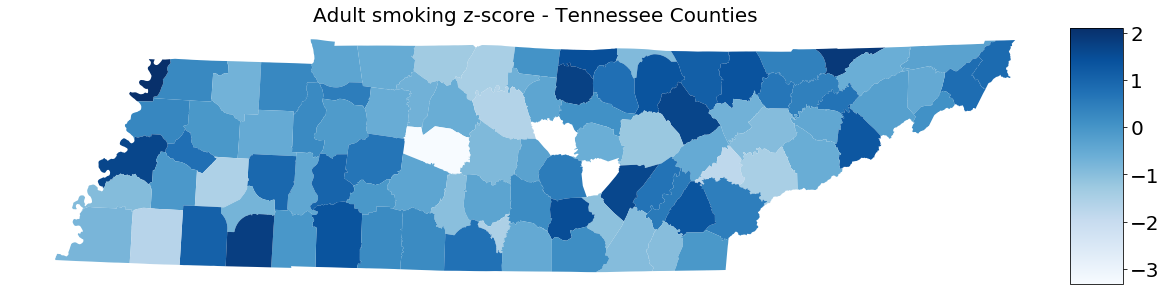

In [164]:
cmap = cm.ScalarMappable(
      norm = Normalize(geo_cancer_factors2['Adult smoking'].min(), geo_cancer_factors2 ['Adult smoking'].max()), 
      cmap = 'Blues')
cmap.set_array([]) 

fig, ax = plt.subplots(figsize = (20, 10))
sns.set_context(rc={'font.size': 10,
                   'axes.labelsize': 20, # X/Y labels
                   'legend.fontsize': 20,
                   'axes.titlesize': 20, # Size of title
                   'xtick.labelsize': 20, # X ticks size
                   'ytick.labelsize': 20}) # Y ticks size
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
fig.colorbar(mappable=cmap, cax = cax)
geo_cancer_factors2.plot(ax = ax, column = 'Adult smoking', cmap = 'Blues')
ax.set_title('Adult smoking z-score - Tennessee Counties')
ax.axis('off');

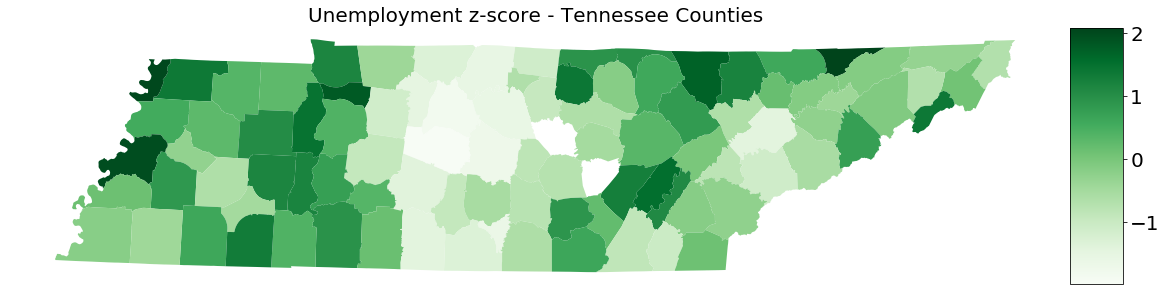

In [165]:
cmap = cm.ScalarMappable(
      norm = Normalize(geo_cancer_factors2.Unemployment.min(), geo_cancer_factors2.Unemployment.max()), 
      cmap = 'Greens')
cmap.set_array([]) 

fig, ax = plt.subplots(figsize = (20, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
fig.colorbar(mappable=cmap, cax = cax)
geo_cancer_factors2.plot(ax = ax, column = 'Unemployment', cmap = 'Greens')
ax.set_title('Unemployment z-score - Tennessee Counties')
ax.axis('off');

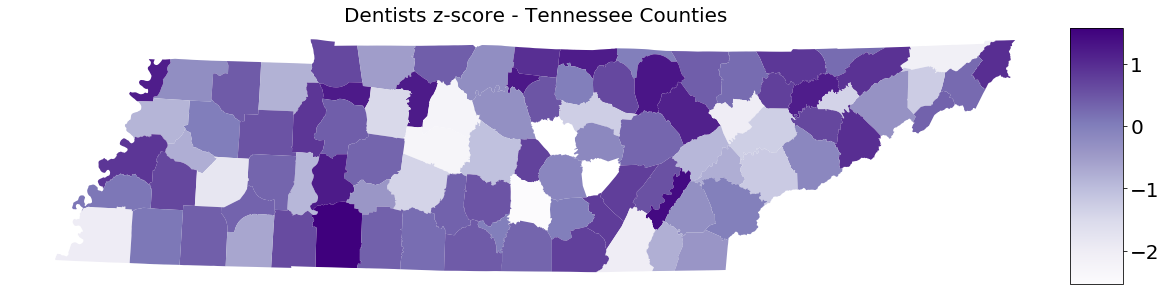

In [166]:
cmap = cm.ScalarMappable(
      norm = Normalize(geo_cancer_factors2.Dentists.min(), geo_cancer_factors2.Dentists.max()), 
      cmap = 'Purples')
cmap.set_array([]) 

fig, ax = plt.subplots(figsize = (20, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
fig.colorbar(mappable=cmap, cax = cax)
geo_cancer_factors2.plot(ax = ax, column = 'Dentists', cmap = 'Purples')
ax.set_title('Dentists z-score - Tennessee Counties')
ax.axis('off');

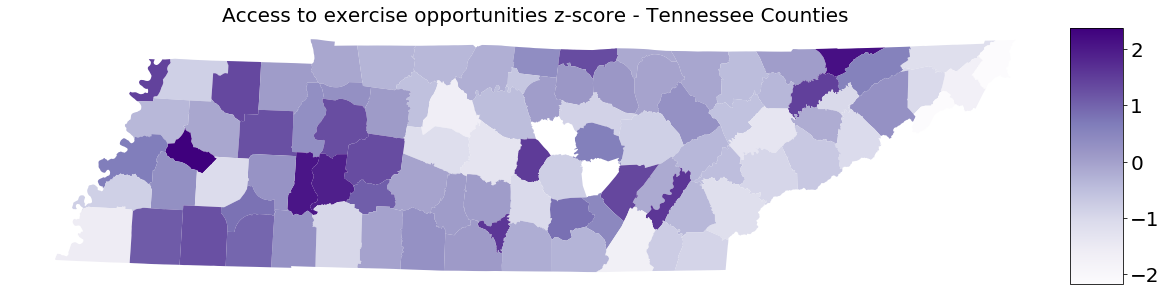

In [167]:
cmap = cm.ScalarMappable(
      norm = Normalize(geo_cancer_factors2['Access to exercise opportunities'].min(), geo_cancer_factors2['Access to exercise opportunities'].max()), 
      cmap = 'Purples')
cmap.set_array([]) 

fig, ax = plt.subplots(figsize = (20, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
fig.colorbar(mappable=cmap, cax = cax)
geo_cancer_factors2.plot(ax = ax, column = 'Access to exercise opportunities', cmap = 'Purples')
ax.set_title('Access to exercise opportunities z-score - Tennessee Counties')
ax.axis('off');